In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df_peliculas = pd.read_csv('DATA_LIMPIO.csv')

In [42]:
df_peliculas

,Titulo,Estreno,Duracion,Ventas,Genero
0,Ella Lola,6/30/2021,184,8642,Comedia
1,In Search of the Ravishing Princess Herzelinde,10/09/2019,65,499,Comedia
2,The Brandon Teena Story,3/23/2021,181,9973,Crimen
3,The Silent Scream,08/10/2019,207,5687,Terror
4,The Tattooed Widow,9/19/2018,110,1880,Crimen
...,...,...,...,...,...
2546,Zookeeper,5/27/2022,181,3819,Fantasia
2547,Zoolander,2/18/2001,159,1010,Comedia
2548,Zorba the Greek,06/11/2021,89,1747,Musical
2549,Zozo,03/10/2023,89,990,Guerra


In [43]:
def plot_por_gen(df: pd.DataFrame, gen:str)->None:
    df[df["genero"] == gen].plot(y =["ventas"])
    plt.savefig(f"img/lt_{gen}.png")
    df[df["genero"] == gen].boxplot(by ='genero')
    plt.savefig(f"img/bplt_{gen}.png")

In [44]:
def create_plot_por_genero(file_name: str):
    df_peliculas = pd.read_csv(file_name)
    df_por_gen = df_peliculas.groupby(["Genero", "Estreno"])[["Ventas"]].mean()
    df_por_gen.reset_index(inplace=True)
    df_por_gen.set_index("Estreno", inplace=True)

    for gen in set(df_por_gen["Genero"]):
        plot_por_gen(df_por_gen, gen)
    
    df_aux = df_peliculas.groupby(["Estreno", "Genero"])[['Ventas']].mean().unstack()
    df_aux.plot(y='Ventas', legend=False, figsize=(32, 18))
    plt.xticks(rotation=90)
    plt.title("Gráfico de Ventas por Fecha y Dependencia")
    plt.show()

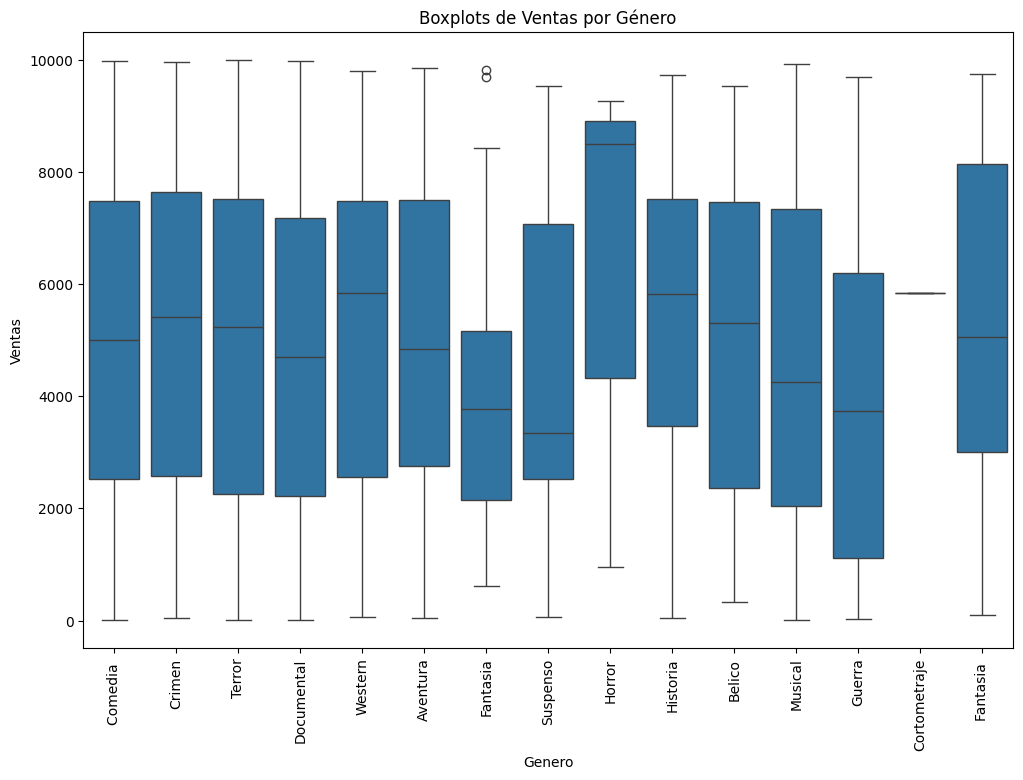

In [45]:
def create_boxplot_por_genero(file_name: str):
    df_peliculas = pd.read_csv(file_name)
    plt.figure(figsize=(12, 8)) 
    sns.boxplot(data=df_peliculas, x='Genero', y='Ventas')

    plt.xticks(rotation=90)
    
    # Añade un título al gráfico
    plt.title("Boxplots de Ventas por Género")
    plt.show()

# Llama a la función
create_boxplot_por_genero('DATA_LIMPIO.csv')

